# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi ogólne:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> ` # YOUR CODE HERE`<br/> ` raise NotImplementedError()`<br/> Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z funkcji przygotowanych w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce.
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, mieć nadane tytuły, opisane osie oraz odpowiednio dobrany rozmiar, wielkość punktów i grubość linii. Proporcje osi wykresów przedstawiających rozkłady punktów powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa grupy, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków grupy) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$. 

In [1]:
NAME = "Piotr Cięgotura, Wojciech Sutowicz, Brunon Kania, Filip Magnowski"
COLLABORATORS = ""

---

## Zestaw zadań 1: Generowanie procesów punktowych

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
sns.set() 
sns.set_theme(style="whitegrid")

### Zadanie 1: Proces regularny z komponentem losowym w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `regular_on_rectangle()`, która będzie generować proces regularny z komponentem losowym w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1) Generujemy punkty na regularnej siatce tak, że poszczególne punkty są oddalone od siebie o odległość $d_x$ w poziomie i $d_y$ w pionie, a skrajne punkty są oddalone od krawędzi obszaru odpowiednio o $\frac{1}{2} d_x$ w poziomie i $\frac{1}{2}d_y$ w pionie.
2) Do współrzędnych każdego z punktów dodajemy komponent losowy określony wzorem $r \cdot rand$ , gdzie $r$ to parametr określający wielkość komponentu losowego, a $rand$ to wartość wylosowana z rozkładu jednostajnego na przedziale $[-\frac{1}{2} d_x, \frac{1}{2} d_x]$ w przypadku współrzędnej $x$ i na przedziale $[-\frac{1}{2} d_y, \frac{1}{2} d_y]$ w przypadku współrzędnej $y$.

Parametry przykładowego rozkładu:
 - liczba punktów w poziomie: 20
 - liczba punktów w pionie: 10
 - wartość współczynnika określającego siłę komponentu losowego: 0.5
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10


#### a) Przygotowanie funkcji

In [2]:
def regular_on_rectangle(grid, random_component, x_lim, y_lim):
    """
    Parameters
    -------
    grid: list
        Lista określająca liczbę punktów w pionie i poziomie.
        Przykład: [10, 10]
    random_component: float
        Liczba z przedziału [0, 1] określająca wielkość komponentu losowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """ 
    #YOUR CODE HERE
    #dx=(Xmax-Xmin)/liczba punktów w x
    #dy=(Ymax-Ymin)/liczba punktów w y
    #np.linspace lub np.arange
    #np.meshgrid
    dx=(x_lim[1]-x_lim[0])/grid[1]
    dy=(y_lim[1]-y_lim[0])/grid[0]
    
    x=np.linspace(0.5*dx,x_lim[1]-(0.5*dx),grid[1])
    y=np.linspace(0.5*dy,y_lim[1]-(0.5*dy),grid[0])
    #x=np.linspace(5,x_lim[1],(grid[1]+1))
    #y=np.linspace(5,y_lim[1],(grid[0]+1))
    
    d1,d2=np.meshgrid(x,y)
 
    
    for i in range(d1.shape[0]):
        for j in range(d2.shape[1]):
            d1[i,j]+= np.random.uniform(-0.5*dx,0.5*dx)*random_component
            d2[i,j]+=np.random.uniform(-0.5*dy,0.5*dy)*random_component
    
    
    
    d = {'X': np.concatenate(d1), 'Y': np.concatenate(d2)}
    df = pd.DataFrame(data=d)     

    return df
    
    
    #raise NotImplementedError()

#### b) Wygenerowanie procesu

In [3]:
# YOUR CODE HERE
#raise NotImplementedError()
d1 = regular_on_rectangle([15,15],0.75,[0,10],[0,10])


#### c) Wizualizacja

            X         Y
0    0.368505  0.572978
1    0.909358  0.475006
2    1.737270  0.364869
3    2.578762  0.248222
4    2.976909  0.142892
..        ...       ...
220  6.858360  9.514804
221  7.694148  9.803791
222  8.479929  9.449082
223  9.043332  9.507155
224  9.657551  9.538401

[225 rows x 2 columns]
0.3685049043087151


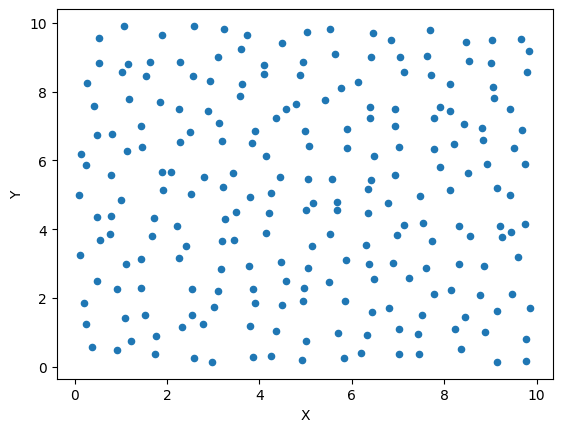

In [4]:
# YOUR CODE HERE
#raise NotImplementedError()
ax1 = d1.plot.scatter(x='X', y='Y')
print(d1)
print(d1['X'][0])

### Zadanie 2: Jednorodny proces punktowy Poissona w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `homogeneous_poisson_on_rectangle()`, która będzie generować jednorodny proces punktowy Poissona w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1. Losujemy liczbę punktów $n$ z rozkładu Poissona o wartości oczekiwanej równej $i \cdot a$, gdzie $i$ to intensywność procesu, a $a$ jest powierzchnią obszaru, na którym generujemy punkty.
2. Niezależnie od siebie losujemy wartości współrzędnych $n$ punktów z rozkładów jednostajnych na przedziałach określonych przez przyjęte zakresy wartości współrzędnych $x$ i $y$.

Parametry przykładowego rozkładu:
 - intensywność procesu: 10
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10

#### a) Przygotowanie funkcji

In [7]:
def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim):
    """
    Parameters
    -------
    intensity: float
        Liczba dodatnia określająca intensywność procesu punktowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    #raise NotImplementedError()
    area = (max(x_lim)-min(x_lim))*(max(y_lim)-min(y_lim))
    #print(area)
    n = sp.stats.poisson.rvs(intensity*area, size=1)
    #print(n)
    x=sp.stats.uniform.rvs(size=n)
    y=sp.stats.uniform.rvs(size=n)
    #print(x)
    #print(len(x))
    #print(y)
    #print(len(y))
    xs = x*(x_lim[1]-x_lim[0])+x_lim[0]
    ys = y*(y_lim[1]-y_lim[0])+y_lim[0]
    
    df=pd.DataFrame()
    df['X']=xs
    df['Y']=ys
    return df


#### b) Wygenerowanie procesu

In [9]:
# YOUR CODE HERE
#raise NotImplementedError()
points_hp = homogeneous_poisson_on_rectangle(10,[0,20],[0,10])

#### c) Wizualizacja

<AxesSubplot: xlabel='X', ylabel='Y'>

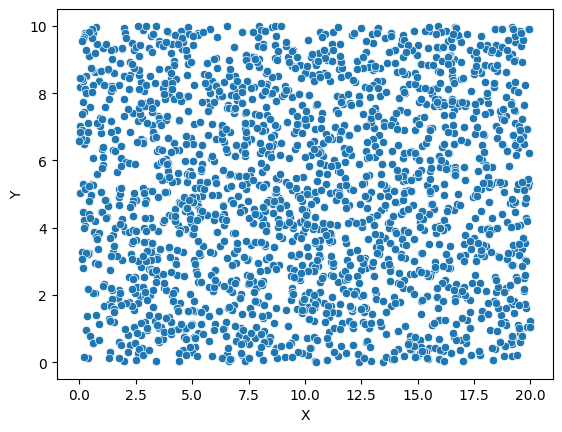

In [10]:
# YOUR CODE HERE
#raise NotImplementedError()
sns.scatterplot(x='X',y='Y',data=points_hp)


### Zadanie 3: Niejednorodny proces punktowy Poissona w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `unhomogeneous_poisson_on_rectangle()`, która będzie generować niejednorodny proces punktowy Poissona w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1. Generujemy punkty z wykorzystaniem jednorodnego procesu Poissona przyjmując intensywność procesu równą maksymalnej wartości jaką osiąga funkcja intensywności w analizowanym obszarze.
2. Przerzedzamy rozkład usuwając z niego punkty z prawdopodobieństwem równym $1-\frac{i}{i_{max}}$, gdzie $i$ to wartość jaką przyjmuje funkcja intensywności dla współrzędnych danego punktu, a $i_{max}$ to maksymalna wartość jaką funkcja intensywności osiąga w granicach analizowanego obszaru.

Parametry przykładowego rozkładu:
 - intensywność procesu: f(x, y) = x
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10

#### a) Przygotowanie funkcji

In [10]:
def io(x,y):
    
    return x**2-x+y
def unhomogeneous_poisson_on_rectangle(x_lim, y_lim,intensity_function=0):
    
    def co(x,y):
        
        return x**2-x+y
    """
    Parameters
    -------
    intensity_function: function
        Funkcja przyjmująca dwa argumenty (macierz 1D współrzędnych X i macierz 1D współrzędnych Y) i zwracająca macierz 1D
        z wartościami funkcji opisującej intensywność procesu dla tych współrzędnych.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10] 
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    
    x1 = np.array(list(np.linspace(x_lim[0],x_lim[1],(x_lim[1]-x_lim[0])**2)))  
    y1 = np.array(list(np.linspace(y_lim[0],y_lim[1],(y_lim[1]-y_lim[0])**2))) 
    #print(x1[1])
    #co(1, 2)
    intensywnosc = 0
    for i in range(0,len(x1)):
        for j in range(0,len(y1)):
            co(1, 2)
            intensywnosc = np.append(intensywnosc,co(x1[i], y1[j]))
    
   
    intensywnosc = np.delete(intensywnosc,0)
    intensywnosc = max(intensywnosc)
    x = homogeneous_poisson_on_rectangle(intensywnosc,x_lim,y_lim) #generuję liczbę punktów losowych
    
   
  
    for i in range(0,len(x['X'])):
        if 1 - co(x['X'][i],x['Y'][i]) / intensywnosc > np.random.rand():
           
            x['X'][i]=0
            x['Y'][i]=0
    
   
    
    df=pd.DataFrame()
    df['X']=x['X']
    df['Y']=x['Y']
    return df #zwracam tablicę współrzędnych
    #raise NotImplementedError()

#### b) Wygenerowanie procesu

In [11]:
# YOUR CODE HERE
#raise NotImplementedError()


tab=unhomogeneous_poisson_on_rectangle([0,20],[0,10])


#### c) Wizualizacja

<AxesSubplot: xlabel='X', ylabel='Y'>

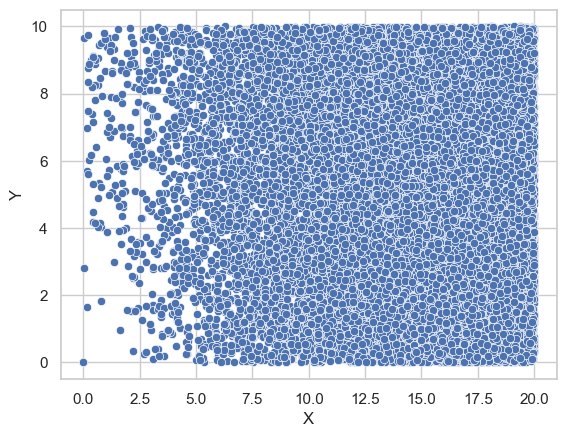

In [12]:
# YOUR CODE HERE
#raise NotImplementedError()
sns.scatterplot(x='X',y='Y',data=tab)

### Zadanie 4: Proces punktowy Matérna w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `materna_on_rectangle()`, która będzie generować proces punktowy Materna w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1. Rozszerzamy analizowany obszar o bufor równy wartości parametru `cluster_radius`.
2. W obrębie rozszerzonego obszaru generujemy punkty w wykorzystaniem jednorodnego procesu Poissona o intensywności równej wartości parametru `parent_intensity`.
3. Wokół każdego z wygenerowanych punktów (okrąg o promieniu równym wartości parametru `cluster_radius`) generujemy punkty z wykorzystaniem jednorodnego procesu Poissona o intensywności równej wartości parametru `daughter_intensity`.
4. Usuwamy z rozkładu wszystkie punkty leżące poza analizowanym (nierozszerzonym) obszarem.

Uwaga! Punkty wygenerowane w ramach procesu macierzystego (centra klastrów) nie są częścią wynikowego rozkładu punktów.

Parametry przykładowego rozkładu:
 - intensywność procesu macierzystego: 0.2
 - intensywność procesu potomnego: 10
 - promień klastra: 1
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10

#### a) Przygotowanie funkcji

In [2]:
import math 
def materna_on_rectangle(parent_intensity, daughter_intensity, cluster_radius, x_lim, y_lim):
    """
    Parameters
    -------
    parent_intensity: float
        Liczba dodatnia określająca intensywność macierzystego procesu punktowego.
    daughter_intensity: float
        Liczba dodatnia określająca intensywność potomnego procesu punktowego.
    cluster_radius: float
        Liczba dodatnia określająca promień generowanych klastrów.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    bufor = cluster_radius
    area = (max(x_lim)-min(x_lim)+2*bufor)*(max(y_lim)-min(y_lim)+2*bufor)
    n = sp.stats.poisson.rvs(parent_intensity*area, size=1)
    print(n)
    x=sp.stats.uniform.rvs(size = n)
    y=sp.stats.uniform.rvs(size = n)
    #print(x)
    #print(len(x))
    #print(y)
    #print(len(y))
    xs = x*(x_lim[1]-x_lim[0]+bufor*2)+(x_lim[0]-bufor)
    ys = y*(y_lim[1]-y_lim[0]+bufor*2)+(y_lim[0]-bufor) #punkty srodkow okrengow
    
    area = (max(x_lim)-min(x_lim)+2*bufor)*(max(y_lim)-min(y_lim)+2*bufor)
    n = sp.stats.poisson.rvs(daughter_intensity*area, size=1)
    #print(n)
    x=sp.stats.uniform.rvs(size = n)
    y=sp.stats.uniform.rvs(size = n)
    #print(x)
    #print(len(x))
    #print(y)
    #print(len(y))
    xw = x*(x_lim[1]-x_lim[0]+bufor*2)+(x_lim[0]-bufor)
    yw = y*(y_lim[1]-y_lim[0]+bufor*2)+(y_lim[0]-bufor) #punkty wygerenowane przed wykasowaniem

    #usuwanie punktow
    arr=0
    for i in range(0,len(xw)):
        for j in range(0,len(xs)):#
            if math.sqrt((xs[j]-xw[i])**2+(ys[j]-yw[i])**2)<cluster_radius:
                arr = np.append(arr, i)#indeksy ktore maja zostac
          
    
    #arr = np.delete(arr,0)
    #print(arr)
    ar=0
    #ar = np.append(ar, arr[0])
    for i in range(0,len(arr)):
        if arr[i-1]==arr[i]:
            ar = np.append(ar, i)
    
    arr = np.delete(arr,ar)# te indeksy mają zostać
    xr=0
    yr=0
    for i in range(0,len(arr)):
        xr = np.append(xr, xw[arr[i]])
        yr = np.append(yr, yw[arr[i]])
    
    xr = np.delete(xr,0)
    yr = np.delete(yr,0)
    arxn=0 #kasowanie punktow poza przedzialem wykresu
    for i in range(0,len(xr)): 
        if xr[i]<x_lim[0]:
            arxn=np.append(arxn,i)
        if xr[i]>x_lim[1]:
            arxn=np.append(arxn,i)
        if yr[i]<y_lim[0]:
            arxn=np.append(arxn,i)
        if yr[i]>y_lim[1]:
            arxn=np.append(arxn,i)
            
    xr=np.delete(xr,arxn)        
    yr=np.delete(yr,arxn)
    
    df=pd.DataFrame()
    df['X']=xr
    df['Y']=yr
    #df2=pd.DataFrame()
    #df2['X']=xs
    #df2['Y']=ys
    return df#,df2

#### b) Wygenerowanie procesu

In [7]:
# YOUR CODE HERE
#raise NotImplementedError()
#dd=materna_on_rectangle(0.2,10,1,[0,20],[0,10])
dd=materna_on_rectangle(0.3,5,0.75,[0,10],[0,10])

[48]


#### c) Wizualizacja

<AxesSubplot: xlabel='X', ylabel='Y'>

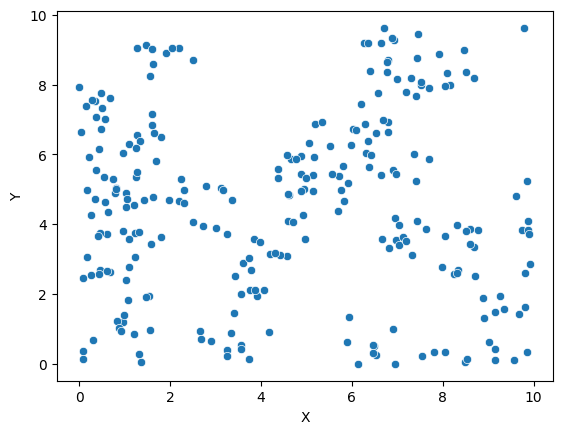

In [8]:
# YOUR CODE HERE
#raise NotImplementedError()
sns.scatterplot(x='X',y='Y',data=dd)

### Zadanie 5: Proces punktowy Thomasa w obrębie prostokątnego obszaru [10 pkt]

Przygotuj funkcję `thomas_on_rectangle()`, która będzie generować proces punktowy Thomasa w obrębie prostokątnego obszaru.
Następnie wykorzystaj przygotowaną funkcję do wygenerowania przykładowego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Algorytm postępowania:
1. Rozszerzamy analizowany obszar o bufor, którego wielkość jest zależna od wartości parametru `cluster_sigma` (na potrzeby zadania przyjmijmy 4-krotność wartości tego parametru).
2. W obrębie rozszerzonego obszaru generujemy punkty w wykorzystaniem jednorodnego procesu Poissona o intensywności równej wartości parametru `parent_intensity`.
3. Dla każdego z wygenerowanych punktów (centrów klastrów):
    - Losujemy liczbę punktów znajdujących się w obrębie danego klastra $n_c$ z rozkładu Poissona o wartości oczekiwanej równej wartości parametru `mean_cluster_size`.
    - Niezależnie od siebie losujemy wartości współrzędnych $n_c$ punktów z rozkładów normalnych o wartości oczekiwanej równej współrzędnej punktu stanowiącego centrum klastra i odchyleniu standardowym równym wartości parametru `cluster_sigma`.
4. Usuwamy z rozkładu wszystkie punkty leżące poza analizowanym (nierozszerzonym) obszarem.

Uwaga! Punkty wygenerowane w ramach procesu macierzystego (centra klastrów) nie są częścią wynikowego rozkładu punktów.

Parametry przykładowego rozkładu:
 - intensywność procesu macierzystego: 0.2
 - średnia liczebność klastra: 30
 - odchylenie standardowe klastra: 0.5
 - zakres wartości współrzędnej x: 0-20
 - zakres wartości współrzędnej y: 0-10

#### a) Przygotowanie funkcji

In [16]:
def thomas_on_rectangle(parent_intensity, mean_cluster_size, cluster_sigma, x_lim, y_lim):
    """
    Parameters
    -------
    parent_intensity: float
        Liczba dodatnia określająca intensywność macierzystego procesu punktowego.
    mean_cluster_size: float
        Liczba dodatnia określająca oczekiwaną liczebność generowanych klastrów.
    cluster_sigma: float
        Liczba dodatnia określająca odchylenie standardowe rozkładu wykorzystywanego w procesie generowania klastrów.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    bufor=cluster_sigma*4 #bufor
    index=0
    area = (max(x_lim)-min(x_lim)+2*bufor)*(max(y_lim)-min(y_lim)+2*bufor)
    n = sp.stats.poisson.rvs(parent_intensity*area, size=1)
    print(n)
    x=sp.stats.uniform.rvs(size = n)
    y=sp.stats.uniform.rvs(size = n)
    #print(x)
    #print(len(x))
    #print(y)
    #print(len(y))
    #xs = x*(x_lim[1]+bufor-x_lim[0])+(x_lim[0]-bufor)
    #ys = y*(y_lim[1]+bufor-y_lim[0])+(y_lim[0]-bufor) #punkty srodkow klastrow
    xs = x*(x_lim[1]-x_lim[0]+bufor*2)+(x_lim[0]-bufor)
    ys = y*(y_lim[1]-y_lim[0]+bufor*2)+(y_lim[0]-bufor) #punkty srodkow klastrow
    #print(len(xs))
    #print(len(ys))
    xp=0
    yp=0 #zmienne do generowania punktow w buforach
    for i in range(0,len(xs)):
        x=sp.stats.uniform.rvs(size = mean_cluster_size)
        y=sp.stats.uniform.rvs(size = mean_cluster_size)#generowanie dla kazdego prostokonta punktow
        for j in range(i*mean_cluster_size,mean_cluster_size*(i+1)):
            xp=np.append(xp, xs[i]-cluster_sigma+x[j-mean_cluster_size*i])
            yp=np.append(yp, ys[i]-cluster_sigma+y[j-mean_cluster_size*i]) #punkty w obszarze rozrzerzonym
            #print(i)
            #print(j)
    xp = np.delete(xp,0)
    yp = np.delete(yp,0)
    xn=0
    yn=0
    for i in range(0,len(xs)):
        x=np.random.normal(size = (abs(int(xs[i])),abs(int(ys[i]))),scale=cluster_sigma)#to tu wartosciom oczekiwana bedzie to co na y punkt 4.
        y=np.random.normal(size = (abs(int(xs[i])),abs(int(ys[i]))),scale=cluster_sigma)
        #print(len(x))
        #print(x)
        for j in range(0,len(x)):
            xn=np.append(xn,x+xs[i]-cluster_sigma)
            yn=np.append(yn,y+ys[i]-cluster_sigma)
    
    xn = np.delete(xn,0)
    yn = np.delete(yn,0)
    #Wycinanie 
    arxp=0 #indeksy ktore trzeba wywalic
    for i in range(0,len(xp)): #docinanie 3. a)
        if xp[i]<x_lim[0]:
            arxp=np.append(arxp,i)
        if xp[i]>x_lim[1]:
            arxp=np.append(arxp,i)
        if yp[i]<y_lim[0]:
            arxp=np.append(arxp,i)
        if yp[i]>y_lim[1]:
            arxp=np.append(arxp,i)
    arxn=0
    for i in range(0,len(xn)): #docinanie 3. b)
        if xn[i]<x_lim[0]:
            arxn=np.append(arxn,i)
        if xn[i]>x_lim[1]:
            arxn=np.append(arxn,i)
        if yn[i]<y_lim[0]:
            arxn=np.append(arxn,i)
        if yn[i]>y_lim[1]:
            arxn=np.append(arxn,i)
            
    xp=np.delete(xp,arxp)        
    yp=np.delete(yp,arxp)
    xn=np.delete(xn,arxn)
    yn=np.delete(yn,arxn)

    xp=np.concatenate((xp,xn))
    yp=np.concatenate((yp,yn))
   
    df=pd.DataFrame()
    df['X']=xp
    df['Y']=yp #punkty w opszaze rozszerzonym

    
    return df
    #raise NotImplementedError()

#### b) Wygenerowanie procesu

In [17]:
# YOUR CODE HERE
#raise NotImplementedError()
dd= thomas_on_rectangle(0.2,30,0.5,[0,20],[0,10])


[73]


#### c) Wizualizacja

<AxesSubplot: xlabel='X', ylabel='Y'>

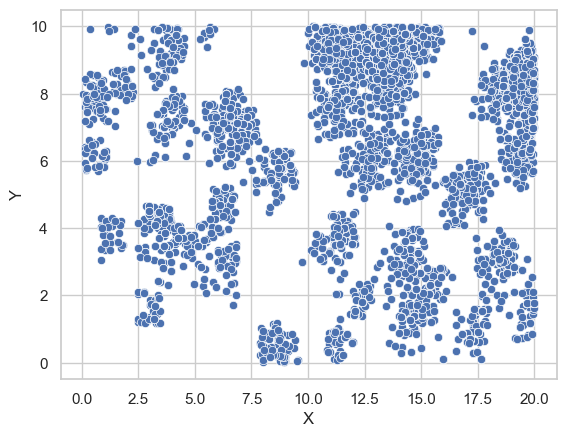

In [18]:
# YOUR CODE HERE
#raise NotImplementedError()

sns.scatterplot(x='X',y='Y',data=dd)#srodki klastrow
